In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from twitter_scraper import settings

users_df = pd.read_csv(settings.USERS_CSV)
nodes_df = pd.read_csv(settings.NODES_CSV)
tweets_df = pd.read_csv(settings.TWEETS_CSV, low_memory=False)
edges_df = pd.read_csv(settings.EDGES_RETWEETS_CSV)

In [2]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32854 entries, 0 to 32853
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           32854 non-null  int64 
 1   user_id_str       32854 non-null  int64 
 2   name              32850 non-null  object
 3   screen_name       32854 non-null  object
 4   location          32854 non-null  object
 5   description       25627 non-null  object
 6   protected         32854 non-null  bool  
 7   verified          32854 non-null  bool  
 8   followers_count   32854 non-null  int64 
 9   friends_count     32854 non-null  int64 
 10  listed_count      32854 non-null  int64 
 11  favourites_count  32854 non-null  int64 
 12  statuses_count    32854 non-null  int64 
 13  created_at        32854 non-null  object
 14  is_croatian       32854 non-null  bool  
 15  clean_location    32854 non-null  object
dtypes: bool(3), int64(7), object(6)
memory usage: 3.4+ MB


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2698723 entries, 0 to 2698722
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   user_id                   int64  
 2   user_id_str               int64  
 3   full_text                 object 
 4   created_at                object 
 5   hashtags                  object 
 6   user_mentions             object 
 7   retweet_from_user_id      float64
 8   retweet_from_user_id_str  object 
 9   geo                       object 
 10  coordinates               object 
 11  retweet_count             int64  
 12  favorite_count            int64  
 13  week                      object 
 14  month                     object 
 15  is_covid                  bool   
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 311.4+ MB


In [6]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9424 non-null   int64  
 1   user_id_str       9424 non-null   int64  
 2   followers_count   9424 non-null   int64  
 3   friends_count     9424 non-null   int64  
 4   listed_count      9424 non-null   int64  
 5   favourites_count  9424 non-null   int64  
 6   statuses_count    9424 non-null   int64  
 7   total_tweets      9424 non-null   int64  
 8   covid_tweets      9424 non-null   int64  
 9   covid_pct         9424 non-null   float64
 10  is_covid          9424 non-null   bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 745.6 KB


In [7]:
nodes_df.groupby('is_covid').size()

is_covid
False    5455
True     3969
dtype: int64

In [8]:
tweets_df.groupby('is_covid').size()

is_covid
False    2621595
True       77128
dtype: int64

In [9]:
len(edges_df)

728

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


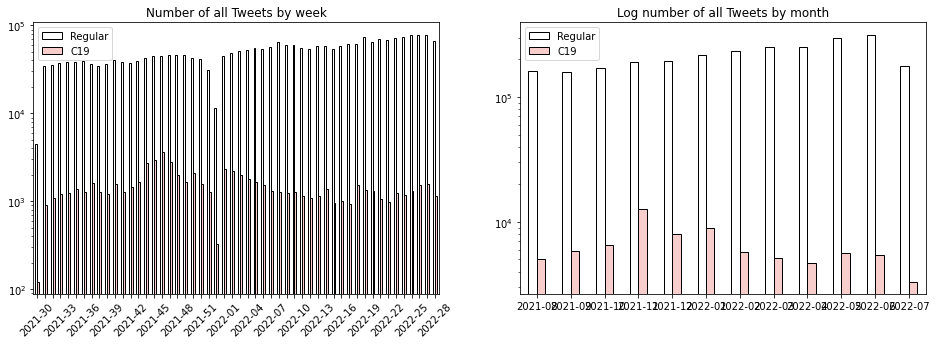

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'week']).size().unstack('is_covid') \
    .plot.bar(
        title="Number of all Tweets by week", 
        rot=45,
        ax=ax[0],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[0].legend(['Regular', 'C19'])
ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


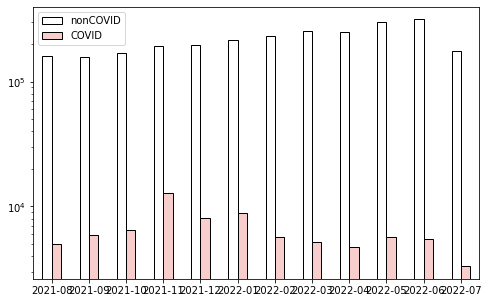

In [19]:
fig, ax = plt.subplots(1, figsize=(8, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        rot=0,
        ax=ax,
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax.legend(['nonCOVID', 'COVID'])
ax.set_xlabel(None)

fig.savefig('tweets-by-month.eps', dpi=320)
fig.savefig('tweets-by-month.png', dpi=320)

plt.show()

In [20]:
tweets_df.groupby(['week', 'is_covid']).size().unstack('is_covid')

is_covid,False,True
week,,
2021-30,4503,122
2021-31,34217,911
2021-32,35331,1101
2021-33,37481,1209
2021-34,38547,1262
2021-35,38728,1388
2021-36,39132,1297
2021-37,36346,1627
2021-38,34832,1265


In [21]:
tweets_df[tweets_df['is_covid'] == True]['full_text'].to_dict()

{13: '@DarkoLesinger Glumci sa dva zagrebačka brega upotpunjavaju se kao zupci patent zatvarača oliti cipferšlusa oliti rajferšlusa u odlično režiranoj predstavi za nas,stoku sitnog zuba. Svjetska situacija sa pandemijom je savršena scena…..',
 19: '@ViliBeros @VladaRH Evo, ja se cijepio prvom dozom, nakon toga prebolio koronu...jučer odem kod doktorice radi nekih bolova oko ključne kosti i prsa, a ona me stavi u izolaciju i pošalje na testiranje umjesto na prave pretrage. Znači ništa više ne postoji osim korone? Bit će da ima para i zdravstvu!',
 111: '@RasmusBoysen92 FYI, six players (Pilipović, Matanović, Slišković, Maraš, Kuzmanović and Načinović) will join the Croatian team in Budapest due to covid problems',
 245: '@Mario16174187 @bglavasevic @IvanaKekin @NLjevica @MileticMarin_ @NikolaGrmoja Zar doista mislite da prije specijalizacije nije završila studij medicine i odgulila praktičnog rada s raznoraznim pacijentima s raznoraznim boleštinama? Zar doista? Ne, ne mislite, samo lup

In [42]:
b = 'radical-revolution:“There is a Tibetan saying: ‘When things are difficult, then let yourself be happy.’ Otherwise, if happiness is relying on others or the environment or your surroundings, it’s not possible. Like an ocean, the waves always go... https://t.co/LQ1u9znsM0'
a = '📹 Jack Johnson - The 3 R’s (Unofficial Lyric Video) Good old song. They all talk about recycling, but this is the third step. First, we have to reduce our consumption. https://t.co/2CV9DUqmWb'
any(tag in b for tag in settings.KEYWORDS['is_covid'])
for tag in settings.KEYWORDS['is_covid']:
    if tag in a:
        print(tag)

# Miscellaneous 

In [7]:
import os
import pandas as pd
from twitter_scraper import settings

user_objs_df = pd.read_csv(os.path.join(settings.USER_OBJS_DIR, 'user-objs.csv'))
users_df = pd.read_csv(settings.USERS_CSV)

print("scrape.tweets: {}".format(len(os.listdir(settings.USER_TWEETS_DIR)) - 1)) # - .gitignore
print("scrape.user_ids: {}".format(len(os.listdir(settings.USER_IDS_DIR)) - 1)) # - .gitignore
print("scrape.user_objs: {}".format(user_objs_df.shape[0]))
print("clean.users: {}".format(users_df.shape[0]))

scrape.tweets: 38215
scrape.user_ids: 42233
scrape.user_objs: 35890
clean.users: 29837
